In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os

%matplotlib inline
os.getcwd()

'C:\\Users\\Hyunjin Kang\\Documents\\Kelly Kang'

In [3]:
movie=pd.read_csv('movie.csv')

In [4]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
strlist=[]
# iteritems : Iterator over (column name, Series) pairs.
for colname,colvalue in movie.iteritems():
    if type(colvalue[1])==str:
        strlist.append(colname)

In [6]:
#column : return column names, index
#difference: Return a new Index with elements from the index that are not in

numlist=movie.columns.difference(strlist)

In [7]:
movie_num=movie[numlist]

In [8]:
movie_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,7.1,0,NaN,NaN,8,NaN


In [9]:
movie_num=movie_num.fillna(value=0,axis=1)

In [10]:
movie_num.values

array([[  1.00000000e+03,   9.36000000e+02,   8.55000000e+02, ...,
          3.05400000e+03,   8.86204000e+05,   2.00900000e+03],
       [  4.00000000e+04,   5.00000000e+03,   1.00000000e+03, ...,
          1.23800000e+03,   4.71220000e+05,   2.00700000e+03],
       [  1.10000000e+04,   3.93000000e+02,   1.61000000e+02, ...,
          9.94000000e+02,   2.75868000e+05,   2.01500000e+03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.00000000e+00,   3.80000000e+01,   2.01300000e+03],
       [  9.46000000e+02,   7.19000000e+02,   4.89000000e+02, ...,
          9.00000000e+00,   1.25500000e+03,   2.01200000e+03],
       [  8.60000000e+01,   2.30000000e+01,   1.60000000e+01, ...,
          8.40000000e+01,   4.28500000e+03,   2.00400000e+03]])

In [11]:
from sklearn.preprocessing import StandardScaler
X=movie_num.values
sc=StandardScaler()
sc.fit(X)
x_std=sc.transform(X)

In [12]:
x_std

array([[-0.36979583, -0.17621365,  0.12814541, ...,  7.36920871,
         5.79567413,  0.17030393],
       [ 2.22832879,  0.83030181,  0.21540842, ...,  2.55945775,
         2.79878363,  0.163411  ],
       [ 0.29638997, -0.3106964 , -0.28951339, ...,  1.91321368,
         1.38800983,  0.19098274],
       ..., 
       [-0.43641441, -0.40802921, -0.38640541, ..., -0.71149073,
        -0.60395204,  0.18408981],
       [-0.37339323, -0.22995721, -0.09211845, ..., -0.69559948,
        -0.59516323,  0.18064334],
       [-0.43068521, -0.40233289, -0.37677639, ..., -0.49695888,
        -0.57328148,  0.15307159]])

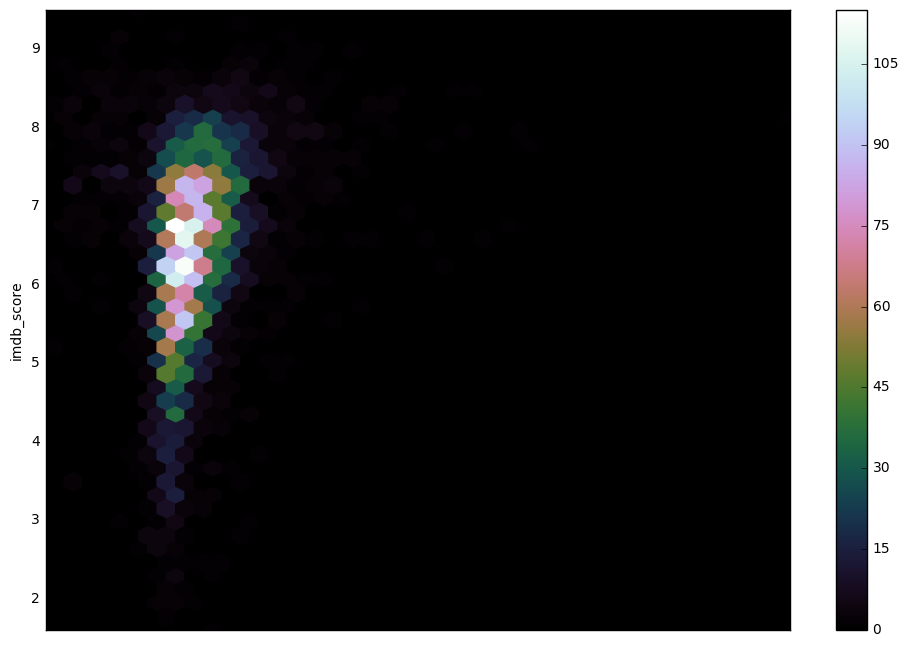

In [13]:
movie.plot(y= 'imdb_score', x ='duration',kind='hexbin',figsize=(12,8),gridsize=40,colormap='cubehelix')


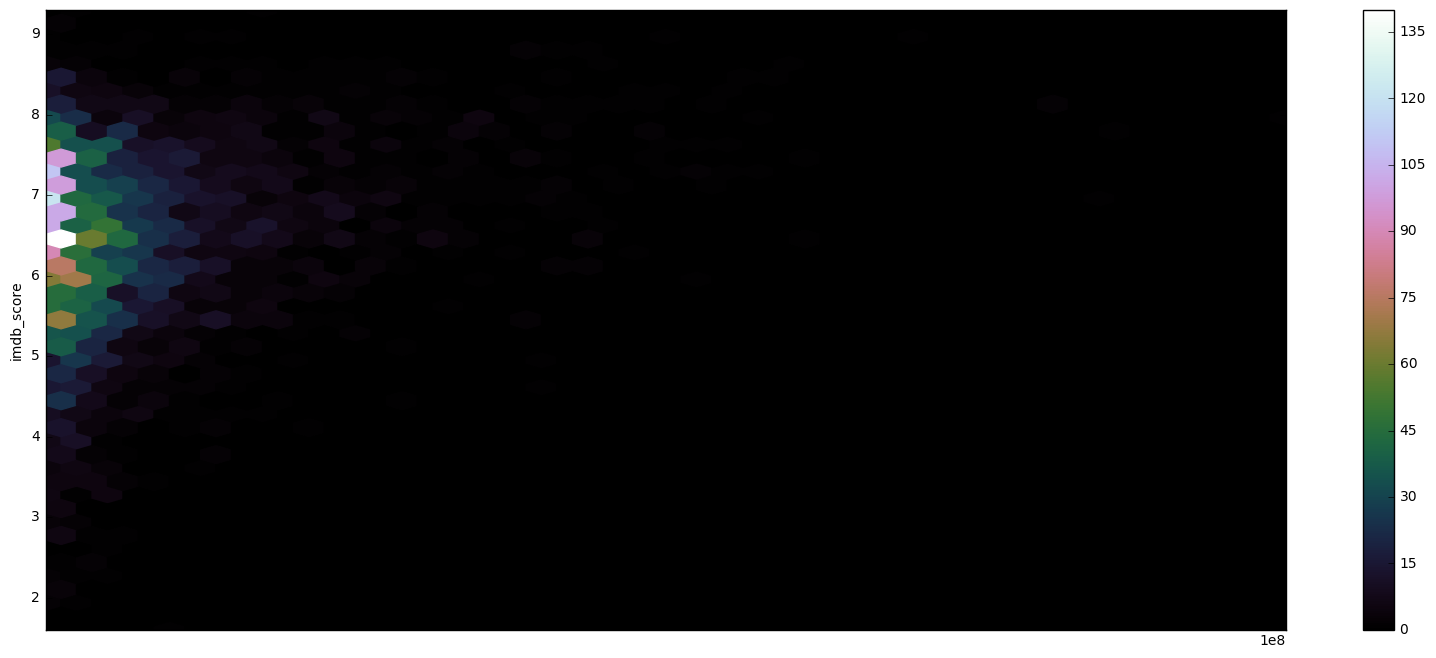

In [14]:
movie.plot(x='gross',y='imdb_score',gridsize=40,figsize=(20,8),colormap='cubehelix',kind='hexbin')

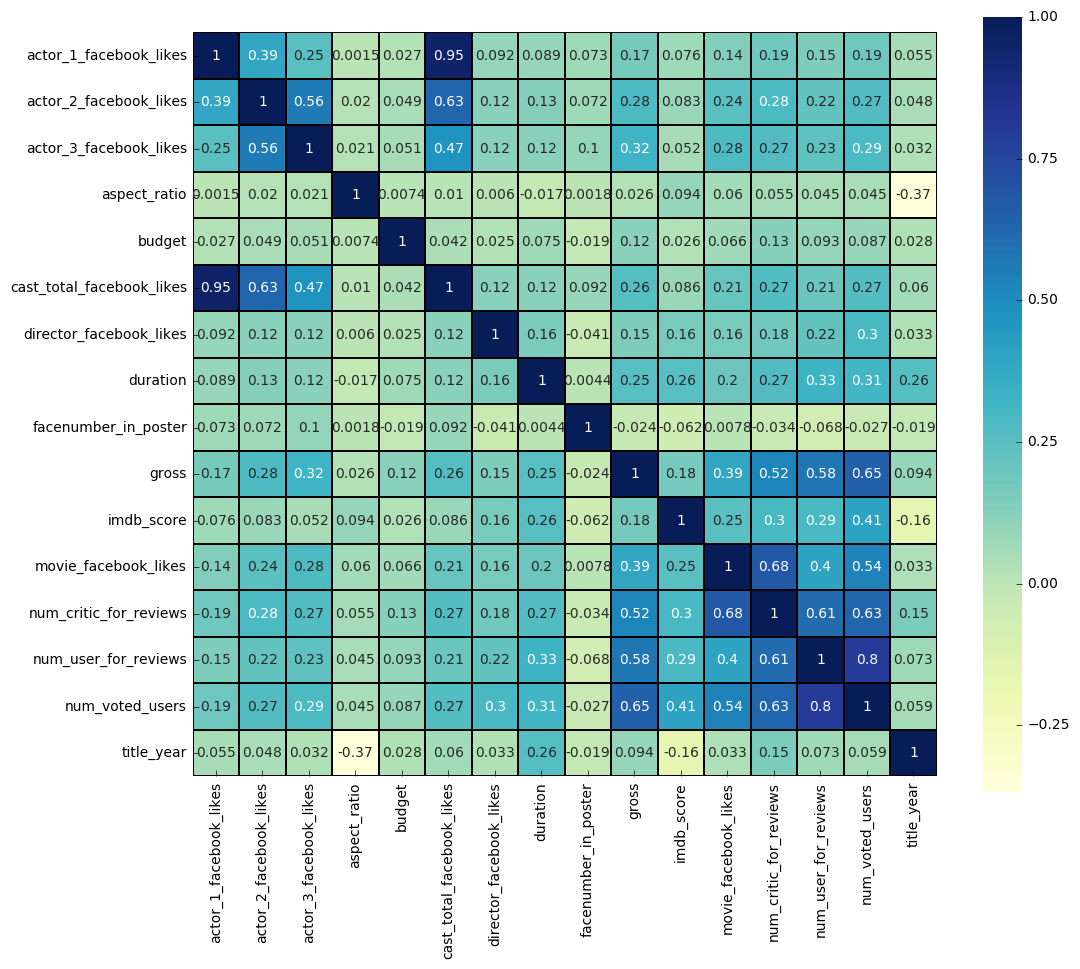

In [15]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(movie_num.corr(),linewidths=0.5,vmax=1,square=True,cmap="YlGnBu",annot=True,linecolor='black')

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [17]:
pca=PCA(n_components=15)
pca.fit(x_std)

PCA(copy=True, n_components=15, whiten=False)

In [32]:
pca.explained_variance_ratio_*100

array([ 0.280504  ,  0.12897243,  0.09200616,  0.0665803 ,  0.06229604,
        0.05973666,  0.05597831,  0.0513082 ,  0.04809516,  0.04591422,
        0.03017496,  0.02641915,  0.02525784,  0.01743157,  0.00922222])

In [19]:
var1=np.cumsum(pca.explained_variance_ratio_)*100

<Container object of 15 artists>

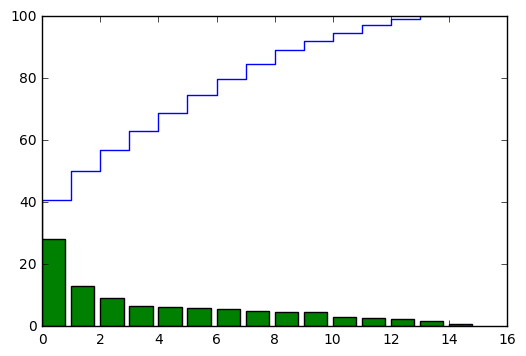

In [34]:
plt.step(range(15),var1)
plt.bar(range(15),pca.explained_variance_ratio_*100,color='green')

In [24]:
x_pca=pca.transform(x_std)

In [25]:
x_pca

array([[  1.14073884e+01,  -6.91513891e+00,   1.11131969e+00, ...,
          1.93648327e+00,  -1.13512169e-01,  -3.92786485e+00],
       [  5.84453502e+00,  -1.41652968e-01,   5.58065815e-01, ...,
          1.36588519e+00,  -5.53069861e-01,  -2.16813258e+00],
       [  5.04957804e+00,  -2.80163114e+00,   3.39982152e-01, ...,
          1.66038520e+00,   7.18380520e-01,  -7.09650434e-02],
       ..., 
       [ -1.99445061e+00,   8.46780454e-02,   7.77321449e-01, ...,
         -2.33715452e-01,   5.80377595e-01,   9.79597115e-01],
       [ -1.55837960e+00,   5.39136509e-01,  -6.44299832e-02, ...,
         -5.11599471e-03,   1.94445508e-01,  -1.58566789e-02],
       [ -1.61100208e+00,  -2.03339262e-01,   5.10296243e-02, ...,
         -6.26264320e-02,  -8.02216394e-02,   4.00488894e-01]])

In [31]:
a=pd.DataFrame(x_pca)

In [56]:
a['x_k']=x_k

In [59]:
a.head()

,0,1,2,3,4,5,6,7,8,x_k
0,11.407388,-6.915139,1.111320,-2.313321,0.974290,-1.237653,1.936483,-0.113512,-3.927865,2
1,5.844535,-0.141653,0.558066,0.761878,1.697806,0.556482,1.365885,-0.553070,-2.168133,2
2,5.049578,-2.801631,0.339982,-1.506079,0.601887,-0.216760,1.660385,0.718381,-0.070965,2
3,20.689187,0.910144,-0.852890,-2.558567,-1.238922,-1.876459,-8.469041,-1.045042,1.812546,1
4,-2.915305,0.299579,-4.989681,-0.303241,0.635621,-2.092386,-0.812521,2.840738,2.745914,0


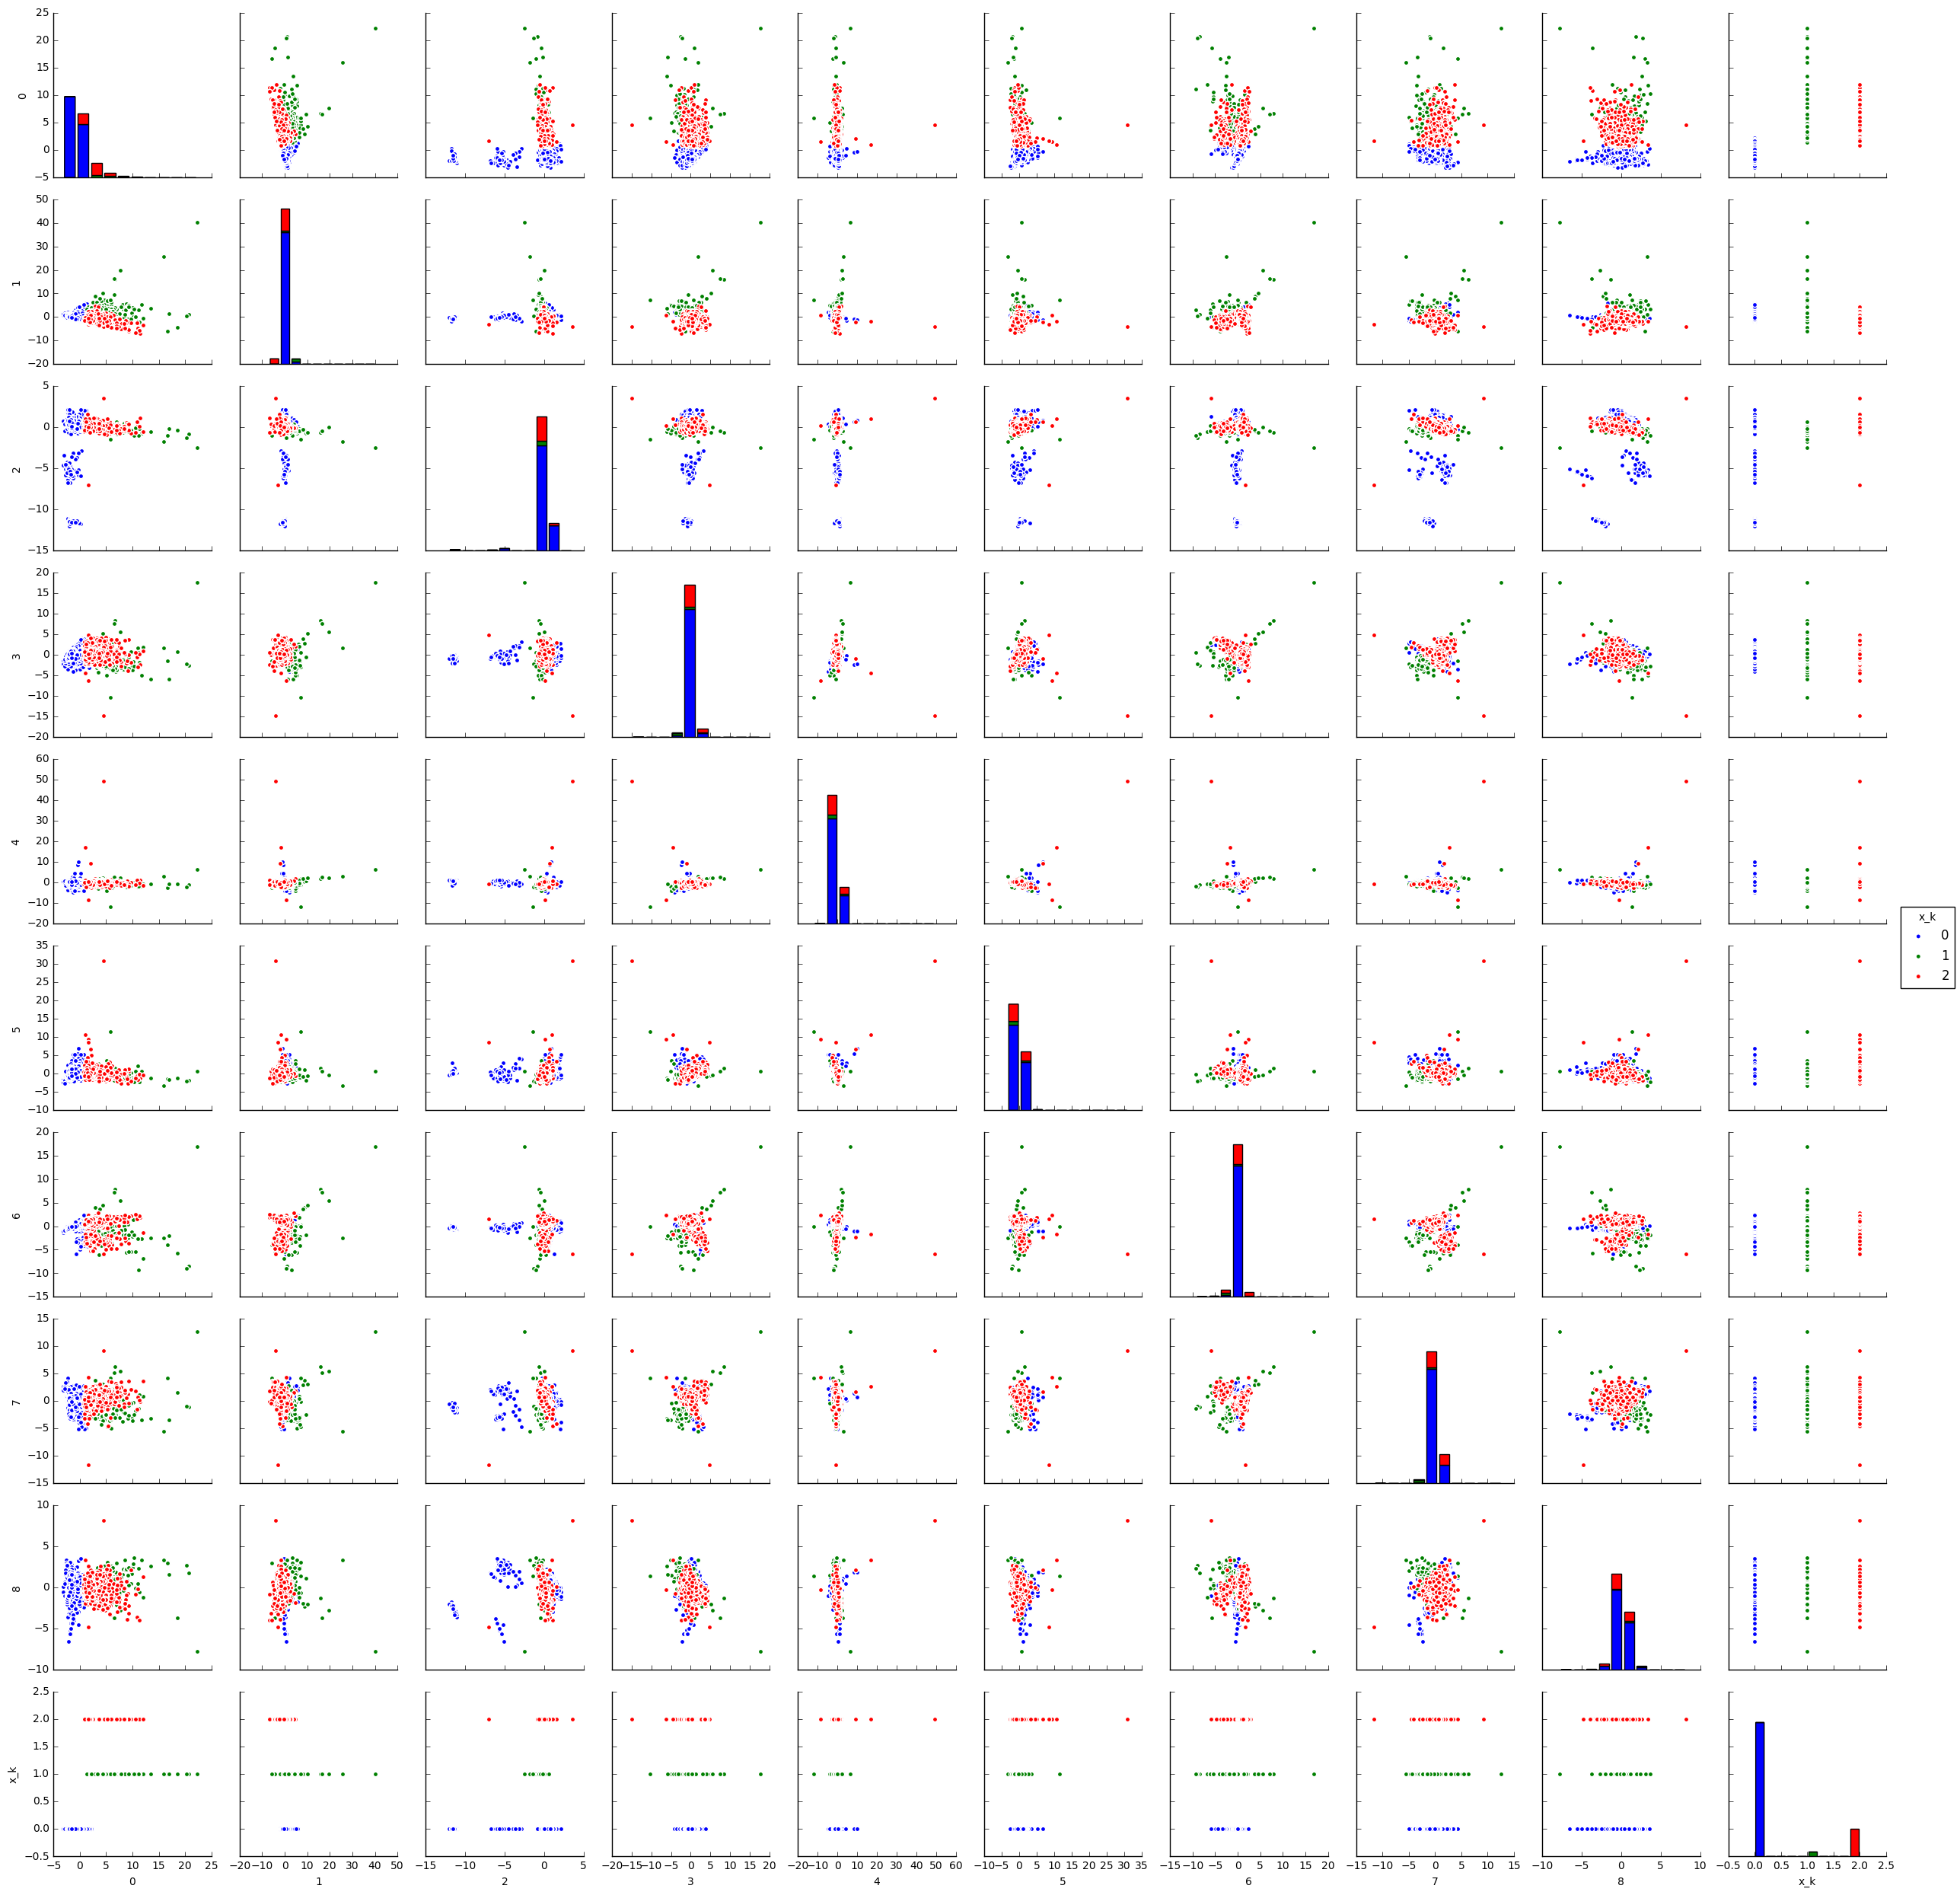

In [60]:
plt.figure(figsize=(20,8))
sns.pairplot(a,hue='x_k')
plt.show()

(-10, 30)

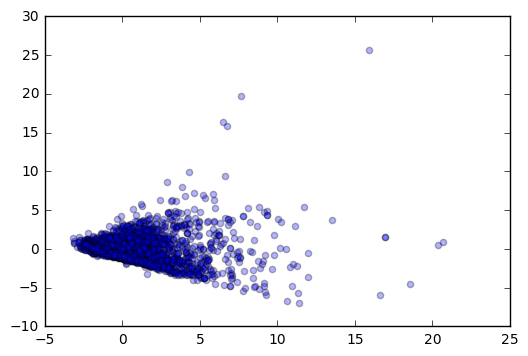

In [92]:
plt.scatter(x_pca[:,0],x_pca[:,1],c='blue',alpha=0.3)
plt.ylim(-10,30)

In [35]:
kmean=KMeans(n_clusters=3)
kmean.fit(x_pca)
x_k=kmean.predict(x_pca)

In [36]:
x_k

array([2, 2, 2, ..., 0, 0, 0])

In [37]:
LABEL_COLOR={0:'r',1:'g',2:'b'}
label_c=[LABEL_COLOR[i] for i in x_k]

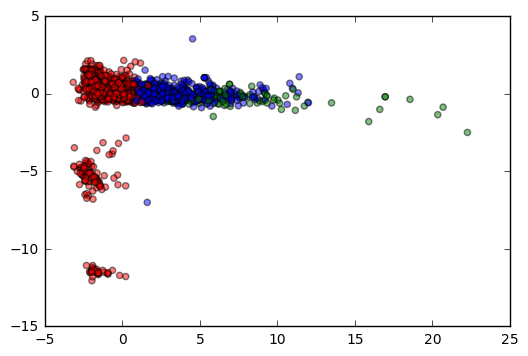

In [55]:
plt.scatter(x_pca[:,0],x_pca[:,2],c=label_c,alpha=0.5)

In [47]:
x_pca

array([[  1.14073884e+01,  -6.91513891e+00,   1.11131969e+00, ...,
          1.93648327e+00,  -1.13512169e-01,  -3.92786485e+00],
       [  5.84453502e+00,  -1.41652968e-01,   5.58065815e-01, ...,
          1.36588519e+00,  -5.53069861e-01,  -2.16813258e+00],
       [  5.04957804e+00,  -2.80163114e+00,   3.39982152e-01, ...,
          1.66038520e+00,   7.18380520e-01,  -7.09650434e-02],
       ..., 
       [ -1.99445061e+00,   8.46780454e-02,   7.77321449e-01, ...,
         -2.33715452e-01,   5.80377595e-01,   9.79597115e-01],
       [ -1.55837960e+00,   5.39136509e-01,  -6.44299832e-02, ...,
         -5.11599471e-03,   1.94445508e-01,  -1.58566789e-02],
       [ -1.61100208e+00,  -2.03339262e-01,   5.10296243e-02, ...,
         -6.26264320e-02,  -8.02216394e-02,   4.00488894e-01]])